In [184]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [185]:
yolo = cv2.dnn.readNet("./yolov5.weights" , "./yolov5.cfg")

In [186]:
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [187]:
len(classes)

80

In [191]:
img = cv2.imread("./Indian-img.jpeg")
height , width, _ = img.shape
print(img.shape)

(355, 630, 3)


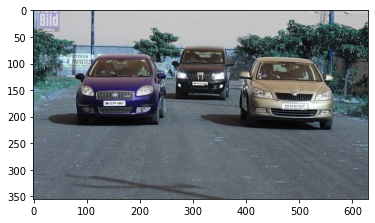

In [192]:
plt.imshow(img)

In [193]:
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [194]:
blob.shape

(1, 3, 320, 320)

In [195]:
blob.size

307200

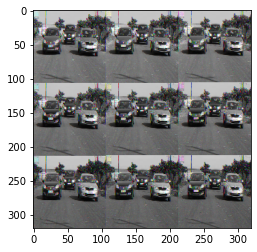

In [196]:
i= blob[0].reshape(320,320,3)
plt.imshow(i)

In [197]:
yolo.setInput(blob)

In [198]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [199]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x-w/2)
      y = int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

In [200]:
len(boxes)

13

In [201]:
indexes = cv2.dnn.NMSBoxes(boxes ,confidences , 0.5 , 0.4)

In [202]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform (0,255,size=(len(boxes),3))

In [203]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],3))
  color = colors[i]

  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label + " " + confi,(x,y+20),font,2,(1,1,1),2)

In [ ]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()